In [1]:
from scipy.integrate import odeint
import numpy
import matplotlib.pyplot as plt
import numpy as np

# Weekly Exercises: week 1

### 1) Solve the Quasi Stationary Approximation of the Consumer Resource Model with 1 species and 1 abiotic resource and compare it numerically with the full solution.

Let's start solving analitically the consumer-resouce model with abiotic resouces in the QSA framework. The full model consist of two coupled differential equations:

\begin{equation}
    \begin{cases}
      \frac{dR}{dt}=\frac{R\mu_{max}}{k_s+R}-cNR \\
      \frac{dN}{dt}=N(\gamma c R-d)
    \end{cases}\,.
\end{equation}

The quasi stationary approximation consists in imposing: $\frac{dR}{dt}|_{R=R^*}=0$ 

$
    \Rightarrow \mu_{max}=cN(k_s+R^*) \\
    \Rightarrow R^*=\frac{\mu_{max}-cNk_s}{cN}=\frac{\mu_{max}}{cN}-k_s\\
$


Substitution in the differential equation for the consumer:
$\\
\Rightarrow \frac{dN}{dt}=N(\gamma c R^*-d)=\mu_{max}\gamma-N(\gamma ck_s+d)
$

$\Rightarrow \frac{dN}{dt}=\tilde{\gamma}-\tilde{d}N\;$ where $\;\tilde{\gamma}=\mu_{max}\gamma\;$ and $\;\tilde{d}=\gamma c K_s+d$

Now we want to solve this non homogeneous linear differential equation following the <b>variation of a constant</b> method.
- <b>Homogeneous equation </b>: 
$$\frac{dN}{dt}+\tilde{d}N=0$$

$\Rightarrow N(t)=C(t)e^{-\tilde{d} t}\;$ where $\;C(t)\;$ is the integration constant which is dependent to the variable $t$.

- <b>General solution</b>:

We start from $\dot{N}(t)=\dot{C}(t)e^{-\tilde{d} t}-\tilde{d}C(t)e^{-\tilde{d} t}$ and we substitute it in the full differential equation: in this way we get an expression of the $C(t)$ variable:

$
\Rightarrow \dot{C}e^{-\tilde{d} t}-\tilde{d}Ce^{-\tilde{d} t}=\tilde{\gamma}-\tilde{d}Ce^{-\tilde{d} t} \\
\Rightarrow \dot{C}(t)=\tilde{\gamma}e^{\tilde{d} t} \\
\Rightarrow C(t)=\tilde{\gamma}\int{e^{\tilde{d} t} dt} = \frac{\tilde{\gamma}}{\tilde{d}}e^{\tilde{d} t}+C_1
$

Finally we get the full solution imposing the initial condition $N(t=0)=N_0=\frac{\tilde{\gamma}}{\tilde{d}}+C_1$ in order to obtain $C_1$:
$$
N(t)=\frac{\tilde{\gamma}}{\tilde{d}}+C_1e^{-\tilde{d} t}=\frac{\tilde{\gamma}}{\tilde{d}}+\left(N_0-\frac{\tilde{\gamma}}{\tilde{d}}\right)e^{-\tilde{d} t}
$$

In [2]:
def Euler(c = 1, 
          mu_max = 1, 
          k_s = 1, 
          gamma = 1, 
          d = 1, 
          Dt = 0.01,               # timestep Delta t
          R_start = 20,            # initial R
          N_start = 20,            # initial N
          t_start = 0,             # start time
          t_end = 150):
    
    n_steps = int(round((t_end-t_start)/Dt))  # number of timesteps
    R_arr = np.zeros(n_steps + 1)   
    N_arr = np.zeros(n_steps +1)    
    t_arr = np.zeros(n_steps + 1)   
    t_arr[0] = t_start             
    R_arr[0] = R_start              
    N_arr[0] = N_start              

    for i in range (1, n_steps + 1):  
        R = R_arr[i-1]
        N = N_arr[i-1]
        t = t_arr[i-1]
        
        # derivative calculation
        dRdt = -c*N*R+mu_max*R/(k_s+R)         
        dNdt = N*(mu_max*c*R-d)                   
        
        # calculation of the next timestep
        R_arr[i] = R + Dt*dRdt  
        N_arr[i] = N + Dt*dNdt  
        t_arr[i] = t + Dt       
    return [t_arr, R_arr, N_arr]


def QSA(t_arr, c = 1, mu_max = 1, k_s = 1, gamma = 1, d = 1):
    
    gamma_tilde = mu_max*gamma
    d_tilde = gamma*c*k_s+d
    N_arr = gamma_tilde/d_tilde+(N_start-gamma_tilde/d_tilde)*np.exp(-d_tilde*t_arr)
    R_arr = mu_max/(c*N_arr)-k_s
    return [R_arr, N_arr]

# plotting the result    
def plot(arr, arr_QSA):
    
    t_arr, R_arr, N_arr = arr[0], arr[1], arr[2]
    R_arr_QSA, N_arr_QSA = arr_QSA[0], arr_QSA[1]
    
    fig = plt.figure(figsize = (20, 30))
    plt.subplots_adjust(hspace=0.5)
    fig.suptitle("QSA vs. Numerical Solution", fontweight = "bold", fontsize = 18)  
    
    ax1 = fig.add_subplot(311)
    ax1.plot(t_arr, N_arr, label = 'N(t)')    
    ax1.plot(t_arr, R_arr, label = 'R(t)')     
    ax1.set_xlabel('t (in seconds)', fontsize=14, fontweight = "bold")
    ax1.set_ylabel('R(t), N(t)', fontsize=14, fontweight = "bold")
    ax1.set_title('R(t), N(t) - Numerical Solution', fontdict={'fontsize': 18})
    ax1.tick_params(axis='both', labelsize=12)
    ax1.legend(loc="upper right", prop={'size':14})
    ax1.grid()
    
    ax2 = fig.add_subplot(312)
    ax2.plot(t_arr, N_arr_QSA, label = 'N(t) - QSA approx')    
    ax2.plot(t_arr, N_arr, label = 'N(t) - Numerical solution')     
    ax2.set_xlabel('t (in seconds)', fontsize=14, fontweight = "bold")
    ax2.set_ylabel('N(t)', fontsize=14, fontweight = "bold")
    ax2.set_title('N(t) - QSA vs. Numerical Solution', fontdict={'fontsize': 18})
    ax2.tick_params(axis='both', labelsize=12)
    ax2.legend(loc="upper right", prop={'size':14})
    ax2.grid()
    
    ax3 = fig.add_subplot(313)
    ax3.plot(t_arr, R_arr_QSA, label = 'R(t) - QSA approx')    
    ax3.plot(t_arr, R_arr, label = 'R(t) - Numerical solution')     
    ax3.set_xlabel('t (in seconds)', fontsize=14, fontweight = "bold")
    ax3.set_ylabel('R(t)', fontsize=14, fontweight = "bold")
    ax3.set_title('R(t) - QSA vs. Numerical Solution', fontdict={'fontsize': 18})
    ax3.tick_params(axis='both', labelsize=12)
    ax3.legend(loc="upper right", prop={'size':14})
    ax3.grid()
    plt.show()   

#### First set of parameters

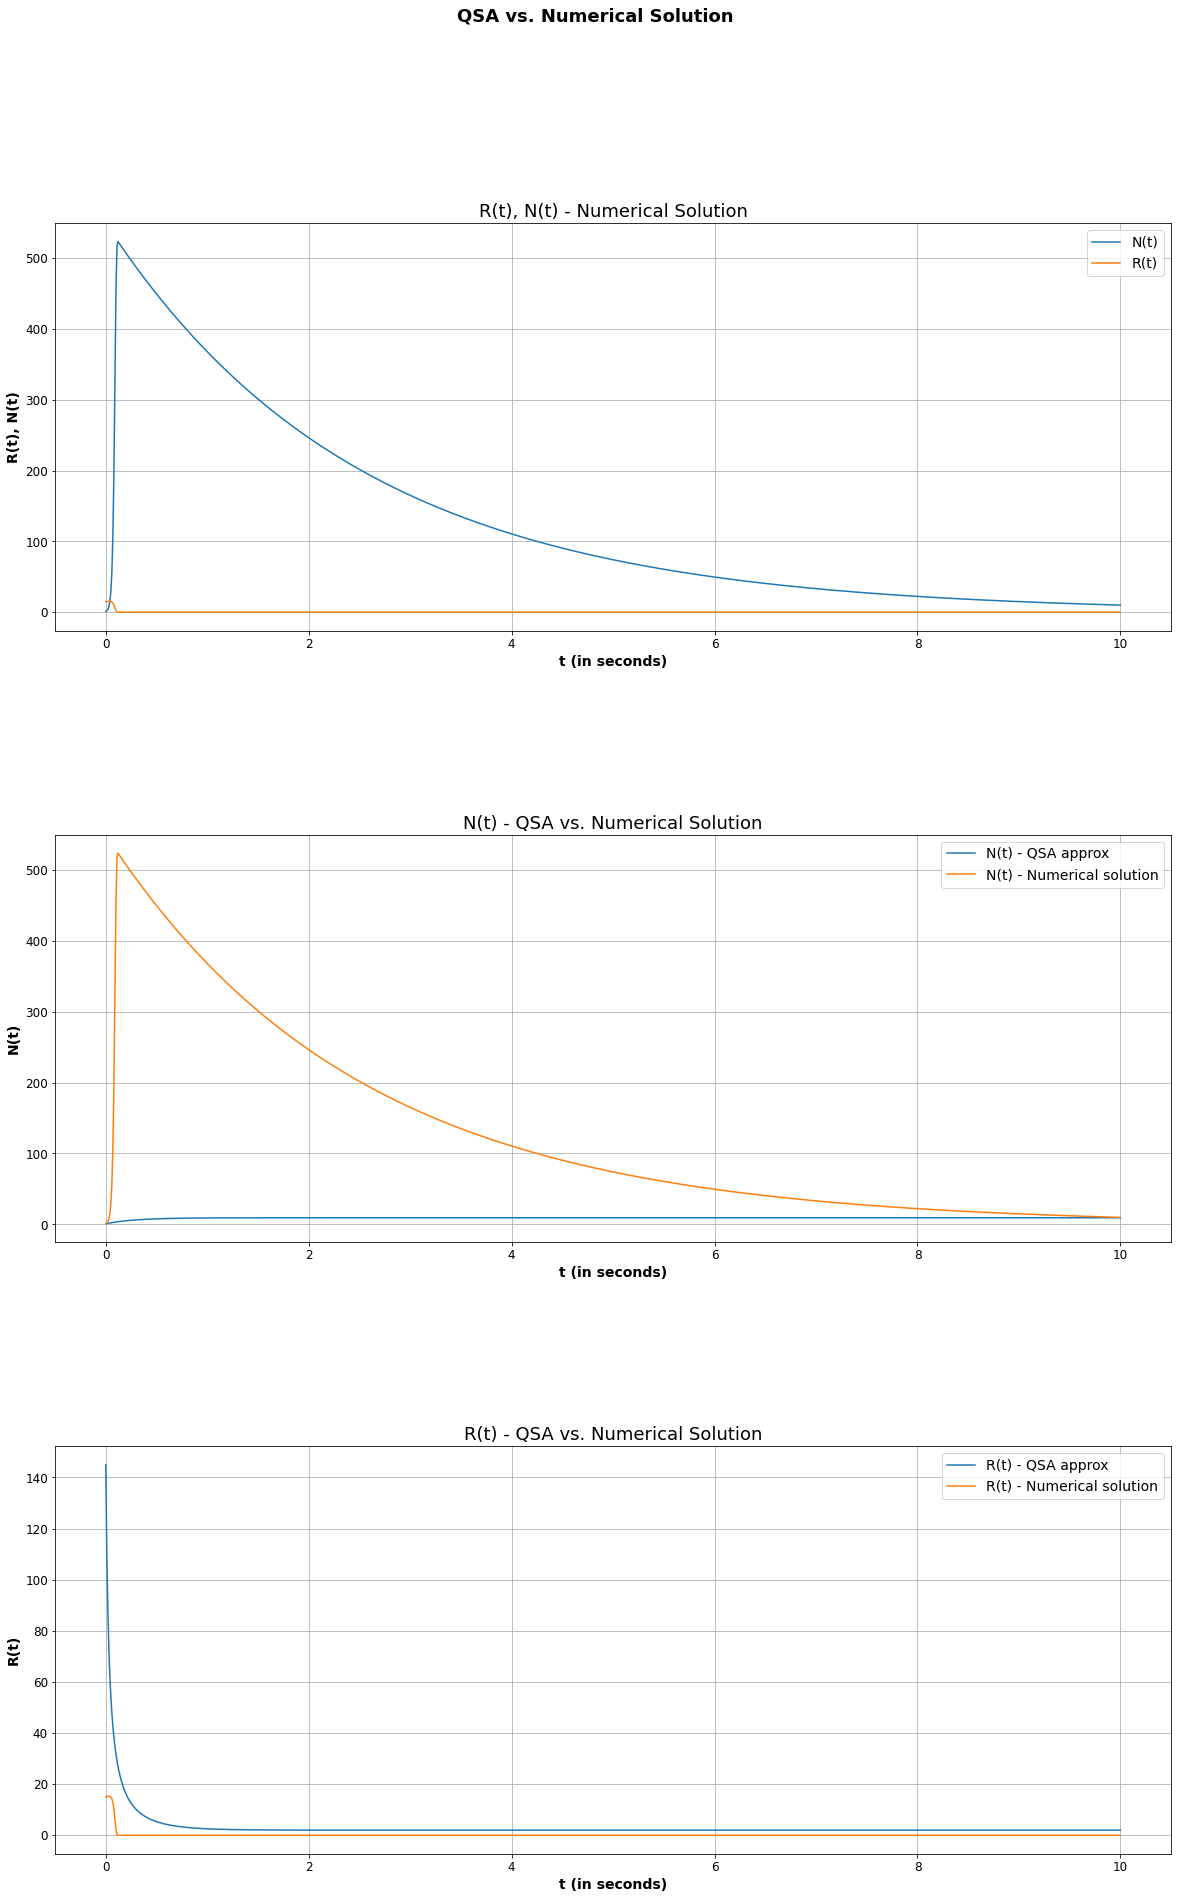

In [3]:
c = 0.2
mu_max = 32
k_s = 15
gamma = 1
d = 0.4

Dt = 0.01
R_start = 15
N_start = 1
t_start = 0
t_end = 10
    
result = Euler(c = c, mu_max = mu_max, k_s = k_s, gamma = gamma, d = d, 
          Dt = Dt, R_start = R_start, N_start = N_start, t_start = t_start, t_end = t_end)
result_QSA = QSA(result[0], c = c, mu_max = mu_max, k_s = k_s, gamma = gamma, d = d)
plot(result, result_QSA)

#### Second set of parameters - Negative solutions

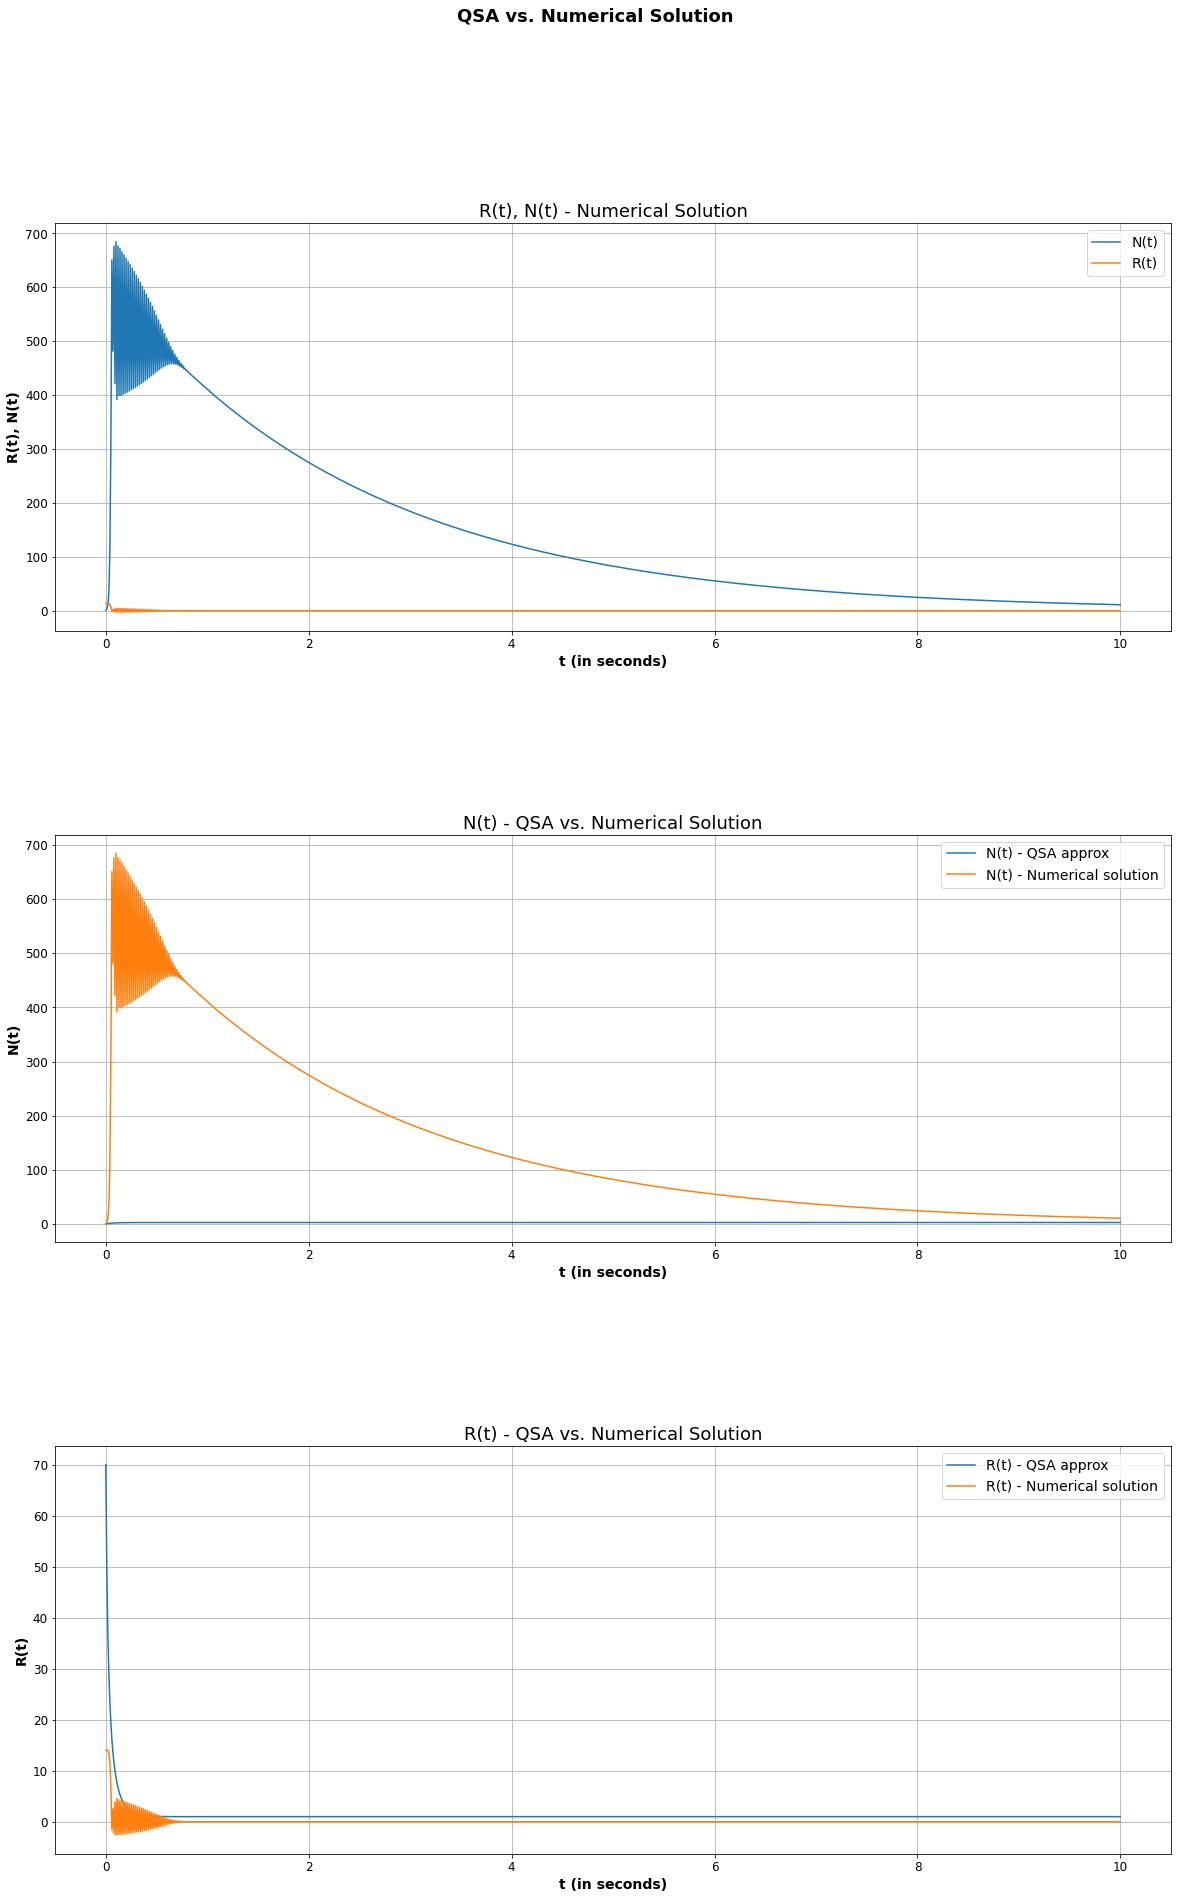

In [4]:
c = 0.4
mu_max = 40
k_s = 30
gamma = 1
d = 0.4

Dt = 0.01
R_start = 14
N_start = 1
t_start = 0
t_end = 10
    
result = Euler(c = c, mu_max = mu_max, k_s = k_s, gamma = gamma, d = d, 
          Dt = Dt, R_start = R_start, N_start = N_start, t_start = t_start, t_end = t_end)
result_QSA = QSA(result[0], c = c, mu_max = mu_max, k_s = k_s, gamma = gamma, d = d)
plot(result, result_QSA)

#### 2) Write the Fokker-Plank Equation associated to the stochastic logistic equation with environmental noise and solve the stationary solution

Let's find the stationary solution $P^*(x)$ of the Fokker Plank Equation associated to the stochastic logistic equation with environmental noise. The starting Langevin equation is the following:

$$
\frac{dx}{dt}=\frac{x}{\tau}\left(1-\frac{x}{k}\right)+\sqrt{\frac{\sigma}{\tau}}x\xi(t)
$$

So we have $A(x)=\frac{x}{\tau}\left(1-\frac{x}{k}\right)$ and $B(x)=\frac{\sigma}{\tau}x^2$. The corresponding Fokker-Plank equation will be:

$$
\frac{\partial P(x,t)}{\partial t}=-\frac{\partial}{\partial x}\left[\frac{x}{\tau}\left(1-\frac{x}{k}\right)P(x,t)\right]+\frac{1}{2}\frac{\partial^2}{\partial x^2}\left[\frac{\sigma}{\tau}x^2P(x,t)\right]
$$

The stationary solution $P^*(x)$ is given by the condition: 
$$\frac{\partial P(x,t)}{\partial t}|_{P^*}=0$$

$\Rightarrow \frac{\partial}{\partial x}\left[-\frac{x}{\tau}\left(1-\frac{x}{k}\right)P^*(x)+\frac{1}{2}\frac{\partial}{\partial x}\left(\frac{\sigma}{\tau}x^2P^*(x)\right)\right] = 0 \\
\Rightarrow \frac{\partial J(x)}{\partial x}=0
\;\;\text{where}\;\; J(x)=\frac{\partial}{\partial x}\left[-\frac{x}{\tau}\left(1-\frac{x}{k}\right)P^*(x)+\frac{1}{2}\frac{\partial}{\partial x}\left(\frac{\sigma}{\tau}x^2P^*(x)\right)\right] \\
\Rightarrow J(x)=\text{const.} \;\;\forall x \\
\Rightarrow \frac{d}{dx}\left[P^*(x)I(x)\right]=0 \;\;\text{where}\;\; I(x)=e^{\frac{2x}{\sigma k}}x^{2\left(1-\frac{1}{\sigma}\right)}=e^{\int \frac{2}{\sigma k}+\frac{2}{x}\left(1-\frac{1}{\sigma}\right)dx} \\
$

Finally we obtain the stationary solution:

$$
P^*(x)=\mathscr{C}I^{-1}(x)=\mathscr{C}e^{-\frac{2x}{\sigma k}}x^{2\left(\frac{1}{\sigma}-1\right)}
$$
with normalization condition given by:
$$
\int_{0}^{\infty} P^*(x)dx = \mathscr{C}\int_{0}^{\infty}e^{-\frac{2x}{\sigma k}}x^{2\left(\frac{1}{\sigma}-1\right)}dx=\mathscr{C}\left(\frac{2x}{\sigma k}\right)^{1-\frac{2}{\sigma}}\Gamma\left(\frac{2}{\sigma}-1\right)=1
$$

#### Optional: numerical simulation of the SDE.

In [5]:
sigma = 0.01                  # Environmental noise parameter     
k = 1                        # carrying capacity                   
tau = 5                       # tau = 1/mu   =>  Logistic equation

dt = 0.001                             # Time step
T = 150                                # Total time
n = int(T / dt)                    # Number of time steps.
t = np.linspace(0., T, n)         # Vector of times

# numerical simulation of the SDE
x = np.zeros(n)
x[0]=0.02
for i in range(n - 1):
    x[i + 1] = x[i] + x[i]/tau*(1-x[i]/k)*dt + np.sqrt(sigma/tau)*x[i]*np.sqrt(dt)*np.random.randn()
    
# logistic growth
x_LG = x[0]*np.exp(t/tau)/(1+x[0]/k*(np.exp(t/tau)-1))

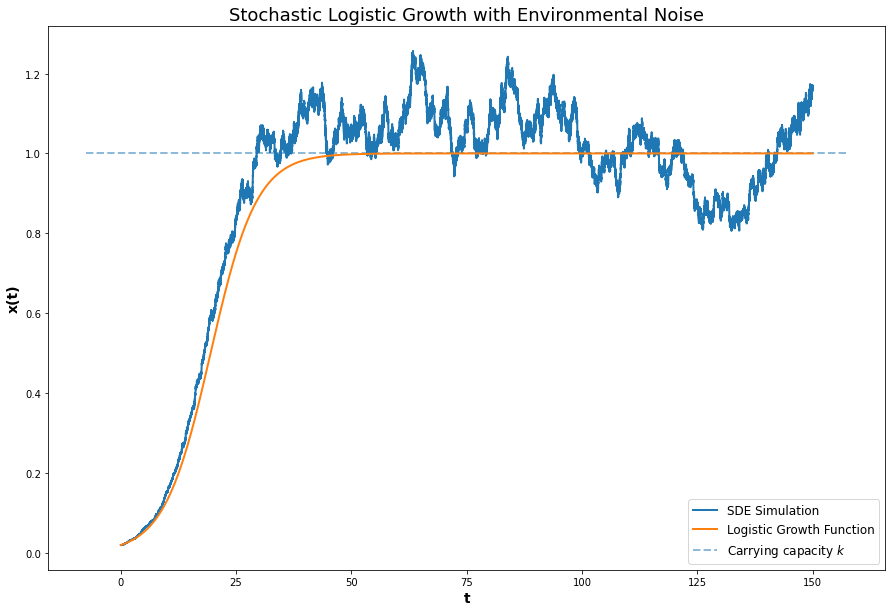

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(t, x, lw = 2, label='SDE Simulation')
ax.plot(t, x_LG, lw = 2, label='Logistic Growth Function')
xmin, xmax = ax.get_xlim()  
ax.hlines(y=k, xmin=xmin, xmax=xmax, ls='--', lw=2, alpha=0.5, label='Carrying capacity $k$')
ax.set_title('Stochastic Logistic Growth with Environmental Noise', fontdict={'fontsize': 18})
ax.set_xlabel('t', fontsize=14, fontweight = "bold")
ax.set_ylabel('x(t)', fontsize=14, fontweight = "bold")
ax.legend(loc="lower right", prop={'size':12})
plt.show()